# Stream Clustering

In [1]:
from scripts.preprocess_data import *
from scripts.preprocess_lemmatizer import preprocess_lemmatizer
from river import cluster
from river import stream
from river import feature_extraction
from river import compose
import nltk
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
#nltk.download('wordnet')


In [2]:
df = load_data()
df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')
df['minute_of_day'] = df['datetime'].dt.hour * 60 + df['datetime'].dt.minute
length = 1000
df_sub = df.iloc[:length]


In [3]:
preprocessed_text_sub = [ preprocess_lemmatizer(tweet)for tweet in df_sub['text']]


In [4]:
text_clust_algo = cluster.TextClust(real_time_fading=False, fading_factor=0.001, tgap=100, auto_r=False,
    radius=0.9, num_macro = 10)

stopwords = [ 'stop', 'the', 'to', 'and', 'a', 'in', 'it', 'is', 'I']

In [5]:
model = compose.Pipeline(
    feature_extraction.BagOfWords(lowercase=True, ngram_range=(1, 2), stop_words=stopwords),
    text_clust_algo,
)

### Variable log [(minute_of_day_1,[(microcluster_id_1, microcluster_weight_1), (microcluster_id_x, microcluster_weight_x)]), (minute_of_day_x,[(microcluster_id_1, microcluster_weight_1), (microcluster_id_x, microcluster_weight_x)])]

In [9]:
i=0
old_time = df_sub.loc[i, 'minute_of_day']
log = []
for text in preprocessed_text_sub:
    
    model.learn_one(text)
    if df_sub.loc[i, 'minute_of_day'] != old_time:
        old_time = df_sub.loc[i, 'minute_of_day']
        micro_clusters = text_clust_algo.micro_clusters
        keys = [int(key) for key in micro_clusters.keys()]
        logging_list = list()
        for key in keys:
            micro_cluster = micro_clusters[key]
            weight = micro_cluster.weight
            logging_list.append((key, weight))

        log.append((old_time, logging_list))
        
    i += 1
log[10]
        #TODO: LOG micro_cluster_id, micro_cluster_weight, minute_of_day
#         old_time = df_sub['datetime'].dt.minute
#         log_micro_clusters.
        
    # i+=1
#text_clust_algo.showclusters(topn=10,num=5)
#text_clust_algo.updateMacroClusters()
#macroclust = text_clust_algo.get_macroclusters()
#distance_matrix = text_clust_algo._get_distance_matrix(text_clust_algo.micro_clusters)



(11,
 [(0, 202.1489792519564),
  (1, 119.09912631706138),
  (2, 21.433525375966205),
  (3, 64.415528933832),
  (4, 150.36934367228264),
  (5, 194.28158858718916),
  (7, 4.394747462103468),
  (15, 24.0860703367472),
  (16, 33.371623106962105),
  (17, 30.39886825684201),
  (26, 17.557371928853936),
  (31, 8.984072637259626),
  (39, 5.516265563229202),
  (42, 32.03363708417103),
  (47, 12.258928103469385),
  (53, 4.382272259023398),
  (54, 26.957183302610183),
  (56, 28.685477739672542),
  (57, 11.382728408030479),
  (60, 25.68592355838851),
  (76, 3.903797640599666),
  (82, 11.026941988530892),
  (85, 3.156815693379905),
  (91, 6.2044462183146045),
  (96, 1.7444453685341352),
  (102, 10.845889747647059),
  (103, 12.967696283418599),
  (109, 1.9128364552918384),
  (111, 7.411512716609373),
  (119, 13.117120573578912),
  (131, 12.631687089874541),
  (132, 3.83134428560566),
  (146, 6.441586850125729),
  (147, 3.028985800057496),
  (151, 3.2484554813589113),
  (159, 7.415554194755443),
  (1

In [16]:
len(log)

15

In [18]:
log[14]

(15,
 [(0, 199.53412387482885),
  (1, 120.34521091036696),
  (2, 21.001404433267805),
  (3, 69.48100940016202),
  (4, 150.9161762094778),
  (5, 198.86971594442787),
  (7, 4.502677149010834),
  (15, 22.405327294924458),
  (16, 32.73876095350647),
  (17, 29.427685577291662),
  (26, 16.06460097776224),
  (31, 8.424846566426597),
  (39, 4.480599922670298),
  (42, 31.4514239316014),
  (47, 11.760927283634741),
  (53, 3.5595111438772085),
  (54, 27.950497234488534),
  (56, 28.25998666520568),
  (57, 12.087607653313764),
  (60, 24.928988418000245),
  (76, 4.103901980003705),
  (82, 11.022638554184649),
  (85, 2.5641311118027987),
  (91, 5.03957630888942),
  (96, 1.4169299309043877),
  (102, 8.809599938141849),
  (103, 11.476856048256284),
  (109, 1.6185630105356148),
  (111, 6.323696076300584),
  (119, 14.984197495356671),
  (131, 13.331273543678162),
  (132, 4.096783648723953),
  (146, 7.1811458261157295),
  (147, 4.263884529458642),
  (151, 4.505278685642446),
  (159, 8.838922410397734),
  

In [47]:
complete_linkage_stream_clust = linkage(distance_matrix,method='ward')

C:\Users\Simon.Luttmann\AppData\Local\Temp\ipykernel_18152\3172585452.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  complete_linkage_stream_clust = linkage(distance_matrix,method='ward')


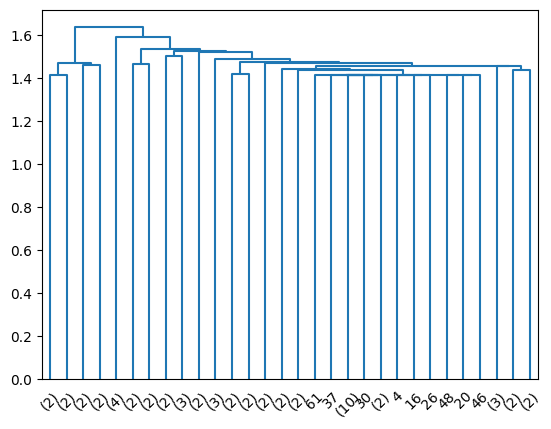

In [49]:
dendrogram(complete_linkage_stream_clust, truncate_mode='lastp', p=30)
plt.show()

In [54]:
threshold = 1.5
#6.3  # Replace with the value identified from the dendrogram
clusters = fcluster(complete_linkage_stream_clust, t=threshold, criterion='distance')
clusters[:]

array([1, 1, 2, 7, 7, 3, 6, 7, 7, 3, 7, 4, 4, 5, 1, 5, 7, 7, 3, 6, 7, 1,
       2, 1, 7, 3, 7, 7, 7, 5, 7, 7, 7, 2, 1, 1, 2, 7, 1, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
      dtype=int32)

In [16]:
text_clust_algo._agglomerative_clustering()

-------------------------------------------
Summary of micro clusters:
----
micro cluster id 0
micro cluster weight 490.25358925561653
weight: 88.32	 token: health
weight: 73.25	 token: politics
weight: 68.8	 token: business
-------------------------------------------


In [ ]:
text_clust_algo.learn_one(preprocessed_text_list_of_dicts[0])
text_clust_algo.micro_clusters

TypeError: can't multiply sequence by non-int of type 'float'